In [6]:
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

import acquire as a
import prepare as p

In [2]:
df = a.get_titanic_data()
df_train, validate, test = p.split_titanic_data(df)
df_train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
115,0,3,21.0,0,0,7.9250,1,1,0,1
322,1,2,30.0,0,0,12.3500,1,0,1,0
762,1,3,20.0,0,0,7.2292,1,1,0,0
281,0,3,28.0,0,0,7.8542,1,1,0,1
628,0,3,26.0,0,0,7.8958,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
0,0,3,22.0,1,0,7.2500,0,1,0,1
885,0,3,39.0,0,5,29.1250,0,0,1,0
646,0,3,19.0,0,0,7.8958,1,1,0,1
432,1,2,42.0,1,0,26.0000,0,0,0,1


In [30]:
df_train.survived.value_counts()

0    237
1    162
Name: survived, dtype: int64

##### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

1. 

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.


In [4]:
# get the most common value in survived
baseline_prediction = df_train.survived.value_counts().idxmax()
baseline_model = pd.Series([baseline_prediction for x in range(df_train.shape[0])])
baseline_model

0      0
1      0
2      0
3      0
4      0
      ..
394    0
395    0
396    0
397    0
398    0
Length: 399, dtype: int64

In [5]:
pd.DataFrame(metrics.classification_report(df_train.survived, baseline_model, labels = [0, 1], output_dict=True)).T

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.593985,1.000000,0.745283,237.000000
1,0.000000,0.000000,0.000000,162.000000
accuracy,0.593985,0.593985,0.593985,0.593985
macro avg,0.296992,0.500000,0.372642,399.000000
weighted avg,0.352818,0.593985,0.442687,399.000000


baseline accuracy is 0.62

2.

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [6]:
# split the train data into X and y sets

X_train = df_train.drop(columns = ['survived'])
y_train = df_train.survived

In [31]:
#make the model object
clf = DecisionTreeClassifier(max_depth = 3, random_state=123)

In [32]:
#train the model

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

[Text(362.7, 618.3449999999999, 'sex_male <= 0.5\ngini = 0.482\nsamples = 399\nvalue = [237, 162]\nclass = perished'),
 Text(181.35, 441.67499999999995, 'pclass <= 2.5\ngini = 0.365\nsamples = 154\nvalue = [37, 117]\nclass = survived'),
 Text(90.675, 265.005, 'age <= 2.5\ngini = 0.096\nsamples = 99\nvalue = [5, 94]\nclass = survived'),
 Text(45.3375, 88.33500000000004, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = perished'),
 Text(136.0125, 88.33500000000004, 'gini = 0.079\nsamples = 97\nvalue = [4, 93]\nclass = survived'),
 Text(272.025, 265.005, 'fare <= 23.087\ngini = 0.487\nsamples = 55\nvalue = [32, 23]\nclass = perished'),
 Text(226.6875, 88.33500000000004, 'gini = 0.497\nsamples = 41\nvalue = [19, 22]\nclass = survived'),
 Text(317.3625, 88.33500000000004, 'gini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = perished'),
 Text(544.05, 441.67499999999995, 'fare <= 56.198\ngini = 0.3\nsamples = 245\nvalue = [200, 45]\nclass = perished'),
 Text(453.375, 265.005, 'age <= 3.5\ng

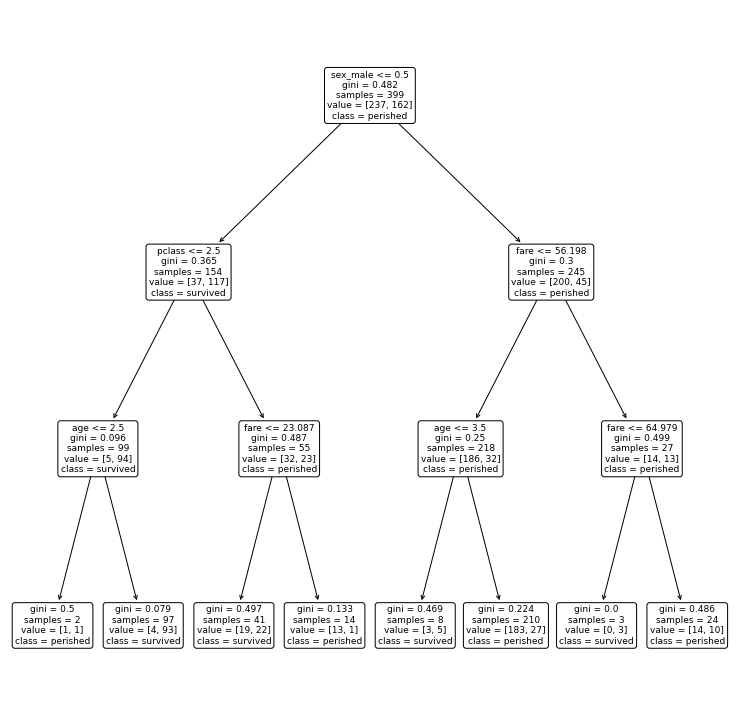

In [33]:
plt.figure(figsize=(13, 13))
plot_tree(clf, feature_names = X_train.columns, class_names = np.array(['perished', 'survived']), rounded=True)

In [37]:
# make predictions using the training data
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 0, 0])

In [38]:
y_pred_prob = clf.predict_proba(X_train)
y_pred_prob[0:5]

array([[0.87142857, 0.12857143],
       [0.04123711, 0.95876289],
       [0.87142857, 0.12857143],
       [0.87142857, 0.12857143],
       [0.87142857, 0.12857143]])

3. 


Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [35]:
f"Accuracy on train data is {clf.score(X_train, y_train)}"

'Accuracy on train data is 0.8370927318295739'

In [43]:
#make a confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_train, y_pred))

,0,1
0,211,26
1,39,123


In [46]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       237
           1       0.83      0.76      0.79       162

    accuracy                           0.84       399
   macro avg       0.83      0.82      0.83       399
weighted avg       0.84      0.84      0.84       399



4.

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [101]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(211, 26, 39, 123)

In [102]:
#true positive rate

tp/(tp+fn)

0.7592592592592593

In [103]:
# false positive rate

fp/(fp+tp)

0.174496644295302

In [104]:
# true negative rate

tn/(tn+fp)

0.890295358649789

In [105]:
# false negative rate

fn/(fn+tp)

0.24074074074074073

In [106]:
# accuracy

(tp+tn)/(tn + fp + fn + tp)

0.8370927318295739

In [107]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       237
           1       0.83      0.76      0.79       162

    accuracy                           0.84       399
   macro avg       0.83      0.82      0.83       399
weighted avg       0.84      0.84      0.84       399



5.

Run through steps 2-4 using a different max_depth value.

[Text(362.7, 588.9, 'sex_male <= 0.5\ngini = 0.482\nsamples = 399\nvalue = [237, 162]\nclass = perished'),
 Text(181.35, 353.34, 'pclass <= 2.5\ngini = 0.365\nsamples = 154\nvalue = [37, 117]\nclass = survived'),
 Text(90.675, 117.77999999999997, 'gini = 0.096\nsamples = 99\nvalue = [5, 94]\nclass = survived'),
 Text(272.025, 117.77999999999997, 'gini = 0.487\nsamples = 55\nvalue = [32, 23]\nclass = perished'),
 Text(544.05, 353.34, 'fare <= 56.198\ngini = 0.3\nsamples = 245\nvalue = [200, 45]\nclass = perished'),
 Text(453.375, 117.77999999999997, 'gini = 0.25\nsamples = 218\nvalue = [186, 32]\nclass = perished'),
 Text(634.725, 117.77999999999997, 'gini = 0.499\nsamples = 27\nvalue = [14, 13]\nclass = perished')]

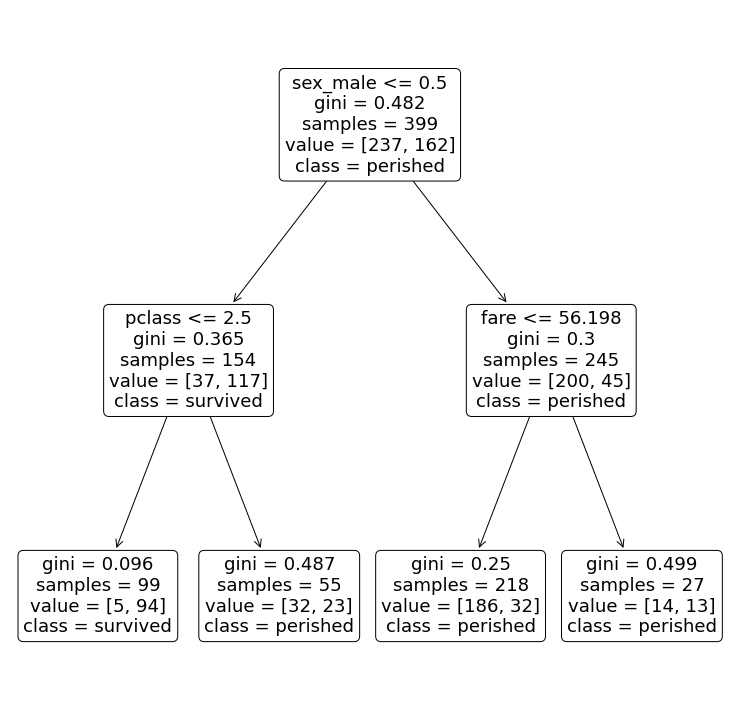

In [108]:
clf2 = DecisionTreeClassifier(max_depth = 2, random_state=123)
clf2 = clf2.fit(X_train, y_train)
plt.figure(figsize=(13, 13))
plot_tree(clf2, feature_names = X_train.columns, class_names = np.array(['perished', 'survived']), rounded=True)

In [109]:
# make predictions using the training data
y_pred2 = clf2.predict(X_train)
y_pred2[0:5]

array([0, 1, 0, 0, 0])

In [110]:
y_pred_prob2 = clf.predict_proba(X_train)
y_pred_prob2[0:5]

array([[0.87142857, 0.12857143],
       [0.04123711, 0.95876289],
       [0.87142857, 0.12857143],
       [0.87142857, 0.12857143],
       [0.87142857, 0.12857143]])

In [111]:
f"Accuracy on train data is {clf2.score(X_train, y_train)}"

'Accuracy on train data is 0.8170426065162907'

In [112]:
pd.DataFrame(metrics.confusion_matrix(y_train, y_pred2))

,0,1
0,232,5
1,68,94


In [113]:
print(metrics.classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       237
           1       0.95      0.58      0.72       162

    accuracy                           0.82       399
   macro avg       0.86      0.78      0.79       399
weighted avg       0.84      0.82      0.81       399



In [114]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_pred2).ravel()
tn, fp, fn, tp

(232, 5, 68, 94)

In [115]:
#true positive rate

tp/(tp+fn)

0.5802469135802469

In [116]:
# false positive rate

fp/(fp+tp)

0.050505050505050504

In [117]:
# true negative rate

tn/(tn+fp)

0.9789029535864979

In [118]:
# false negative rate

fn/(fn+tp)

0.41975308641975306

In [119]:
# accuracy

(tp+tn)/(tn + fp + fn + tp)

0.8170426065162907

In [120]:
print(metrics.classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       237
           1       0.95      0.58      0.72       162

    accuracy                           0.82       399
   macro avg       0.86      0.78      0.79       399
weighted avg       0.84      0.82      0.81       399



6.

Which model performs better on your in-sample data?


- Since there is not a high cost to false positive/negative, we can use the f1-score to evaluate the models.  THis means that the first model with a depth of 3 is better at the in-sample data

7.

Which model performs best on your out-of-sample data, the validate set?

In [122]:
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

- model 1

In [123]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.76


In [125]:
y_pred = clf.predict(X_validate)

print(metrics.classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        85
           1       0.72      0.66      0.68        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.74       143
weighted avg       0.75      0.76      0.75       143



- model 2

In [126]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf2.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.78


In [127]:
y_pred2 = clf2.predict(X_validate)

print(metrics.classification_report(y_validate, y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84        85
           1       0.93      0.48      0.64        58

    accuracy                           0.78       143
   macro avg       0.83      0.73      0.74       143
weighted avg       0.82      0.78      0.76       143



Both seem pretty similar. model2 seems like a more precise model when predicting survival, so it would be preferred.  In addition, it's overall f1-score is higher, so it might be an overall good middle ground.

### telco data set

In [7]:
df_telco = a.get_telco_data()
telco_train, t_validate, t_test = p.split_telco_data(df_telco)

In [8]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 2870 to 1846
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   gender                                 3937 non-null   object 
 2   senior_citizen                         3937 non-null   int64  
 3   partner                                3937 non-null   object 
 4   dependents                             3937 non-null   object 
 5   tenure                                 3937 non-null   int64  
 6   phone_service                          3937 non-null   object 
 7   multiple_lines                         3937 non-null   object 
 8   online_security                        3937 non-null   object 
 9   online_backup                          3937 non-null   object 
 10  device_protection                      3937 non-null   object 
 11  t

make a baseline model

In [9]:
(telco_train.churn == 'Yes').mean()

0.2656845313690627

In [10]:
#most of the customers do not churn. baseline model is no one churns
baseline_prediction = telco_train.churn_Yes.value_counts().idxmax()
baseline_model = pd.Series([baseline_prediction for x in range(telco_train.shape[0])])
baseline_model

0       0
1       0
2       0
3       0
4       0
       ..
3932    0
3933    0
3934    0
3935    0
3936    0
Length: 3937, dtype: int64

baseline prediction is a customer does not churn

In [11]:
pd.DataFrame(metrics.classification_report(telco_train.churn_Yes, baseline_model, labels = [0, 1], output_dict=True)).T


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.734315,1.000000,0.846807,2891.000000
1,0.000000,0.000000,0.000000,1046.000000
accuracy,0.734315,0.734315,0.734315,0.734315
macro avg,0.367158,0.500000,0.423404,3937.000000
weighted avg,0.539219,0.734315,0.621824,3937.000000


baseline accuracy is about 0.73

make a model and fit it to the data


In [12]:
X_telco_train = telco_train.select_dtypes(exclude = 'object').drop(columns = 'churn_Yes')
y_telco_train = telco_train.churn_Yes

clf_telco = DecisionTreeClassifier(max_depth = 2, random_state = 321)

cfl_telco = clf_telco.fit(X_telco_train, y_telco_train)

[Text(418.5, 679.5, 'tenure <= 17.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = no churn'),
 Text(209.25, 407.69999999999993, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.495\nsamples = 1492\nvalue = [818, 674]\nclass = no churn'),
 Text(104.625, 135.89999999999998, 'gini = 0.407\nsamples = 840\nvalue = [601, 239]\nclass = no churn'),
 Text(313.875, 135.89999999999998, 'gini = 0.444\nsamples = 652\nvalue = [217, 435]\nclass = churn'),
 Text(627.75, 407.69999999999993, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.258\nsamples = 2445\nvalue = [2073, 372]\nclass = no churn'),
 Text(523.125, 135.89999999999998, 'gini = 0.111\nsamples = 1334\nvalue = [1255, 79]\nclass = no churn'),
 Text(732.375, 135.89999999999998, 'gini = 0.388\nsamples = 1111\nvalue = [818, 293]\nclass = no churn')]

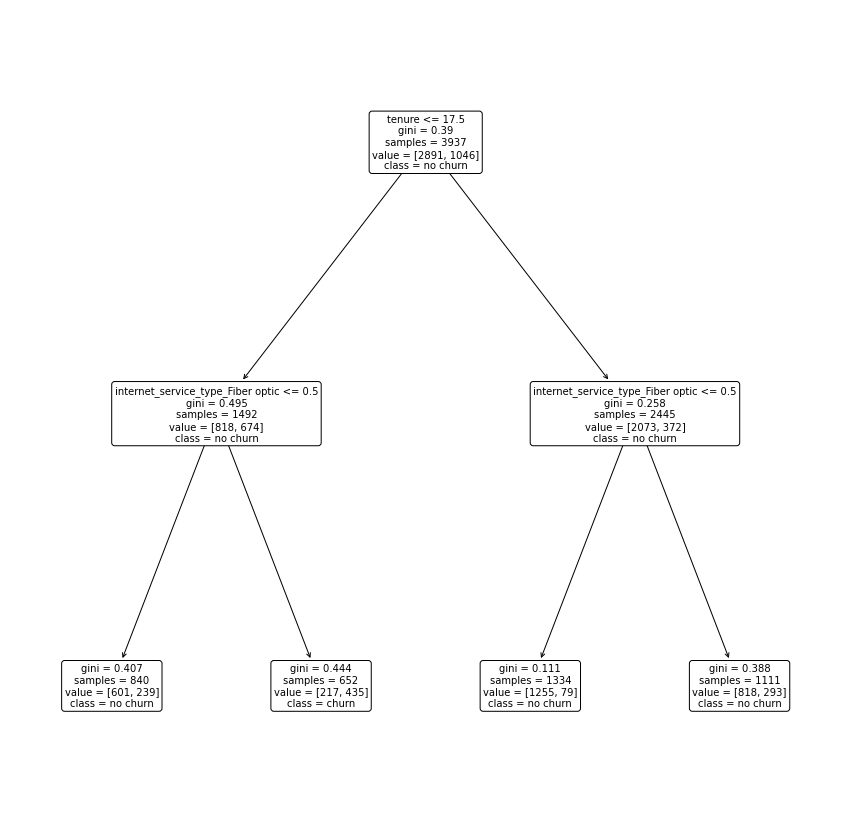

In [13]:
plt.figure(figsize=(15, 15))
plot_tree(clf_telco, feature_names = X_telco_train.columns, class_names = np.array(['no churn', 'churn']), rounded=True)

In [14]:
#predict using the training set
# make predictions using the training data
y_pred_telco = clf_telco.predict(X_telco_train)
y_pred_telco[0:5]

array([0, 1, 0, 1, 0], dtype=uint8)

In [15]:
y_pred_prob_telco = clf_telco.predict_proba(X_telco_train)
y_pred_prob_telco[0:5]

array([[0.73627363, 0.26372637],
       [0.33282209, 0.66717791],
       [0.73627363, 0.26372637],
       [0.33282209, 0.66717791],
       [0.94077961, 0.05922039]])

In [19]:
#confusion matrix
pd.DataFrame(metrics.confusion_matrix(y_telco_train, y_pred_telco))

,0,1
0,2674,217
1,611,435


In [20]:
y_telco_train.value_counts()

0    2891
1    1046
Name: churn_Yes, dtype: int64

In [42]:
tn, fp, fn, tp = metrics.confusion_matrix(y_telco_train, y_pred_telco).ravel()

tp_rate = tp/(fn+tp)
tn_rate = tn/(fp+tn)
fp_rate = fp/(fp+tp)
fn_rate = fn/(fn+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)

print(f"tp_rate = {tp_rate}\ntn_rate = {tn_rate}\nfp_rate = {fp_rate}\nfn_rate = {fn_rate}\nacc = {accuracy}")

tp_rate = 0.41586998087954113
tn_rate = 0.9249394673123487
fp_rate = 0.3328220858895706
fn_rate = 0.18599695585996956
acc = 0.7896875793751588


In [40]:
print(metrics.classification_report(y_telco_train, y_pred_telco))

              precision    recall  f1-score   support

           0       0.81      0.92      0.87      2891
           1       0.67      0.42      0.51      1046

    accuracy                           0.79      3937
   macro avg       0.74      0.67      0.69      3937
weighted avg       0.77      0.79      0.77      3937



In [24]:
f"Accuracy of Decision Tree Classifier on train set: {clf_telco.score(X_telco_train, y_telco_train)}"

'Accuracy of Decision Tree Classifier on train set: 0.7896875793751588'

make a second model with more depth.  maybe this won't overfit because there are so many variables

[Text(558.0, 996.6, 'tenure <= 17.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = no churn'),
 Text(279.0, 815.4000000000001, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.495\nsamples = 1492\nvalue = [818, 674]\nclass = no churn'),
 Text(139.5, 634.2, 'tenure <= 5.5\ngini = 0.407\nsamples = 840\nvalue = [601, 239]\nclass = no churn'),
 Text(69.75, 453.0, 'online_backup_No internet service <= 0.5\ngini = 0.484\nsamples = 443\nvalue = [261, 182]\nclass = no churn'),
 Text(34.875, 271.79999999999995, 'total_charges <= 96.425\ngini = 0.5\nsamples = 276\nvalue = [138, 138]\nclass = no churn'),
 Text(17.4375, 90.59999999999991, 'gini = 0.489\nsamples = 160\nvalue = [68, 92]\nclass = churn'),
 Text(52.3125, 90.59999999999991, 'gini = 0.479\nsamples = 116\nvalue = [70, 46]\nclass = no churn'),
 Text(104.625, 271.79999999999995, 'total_charges <= 20.225\ngini = 0.388\nsamples = 167\nvalue = [123, 44]\nclass = no churn'),
 Text(87.1875, 90.59999999999991, 'gini = 0.472\nsamp

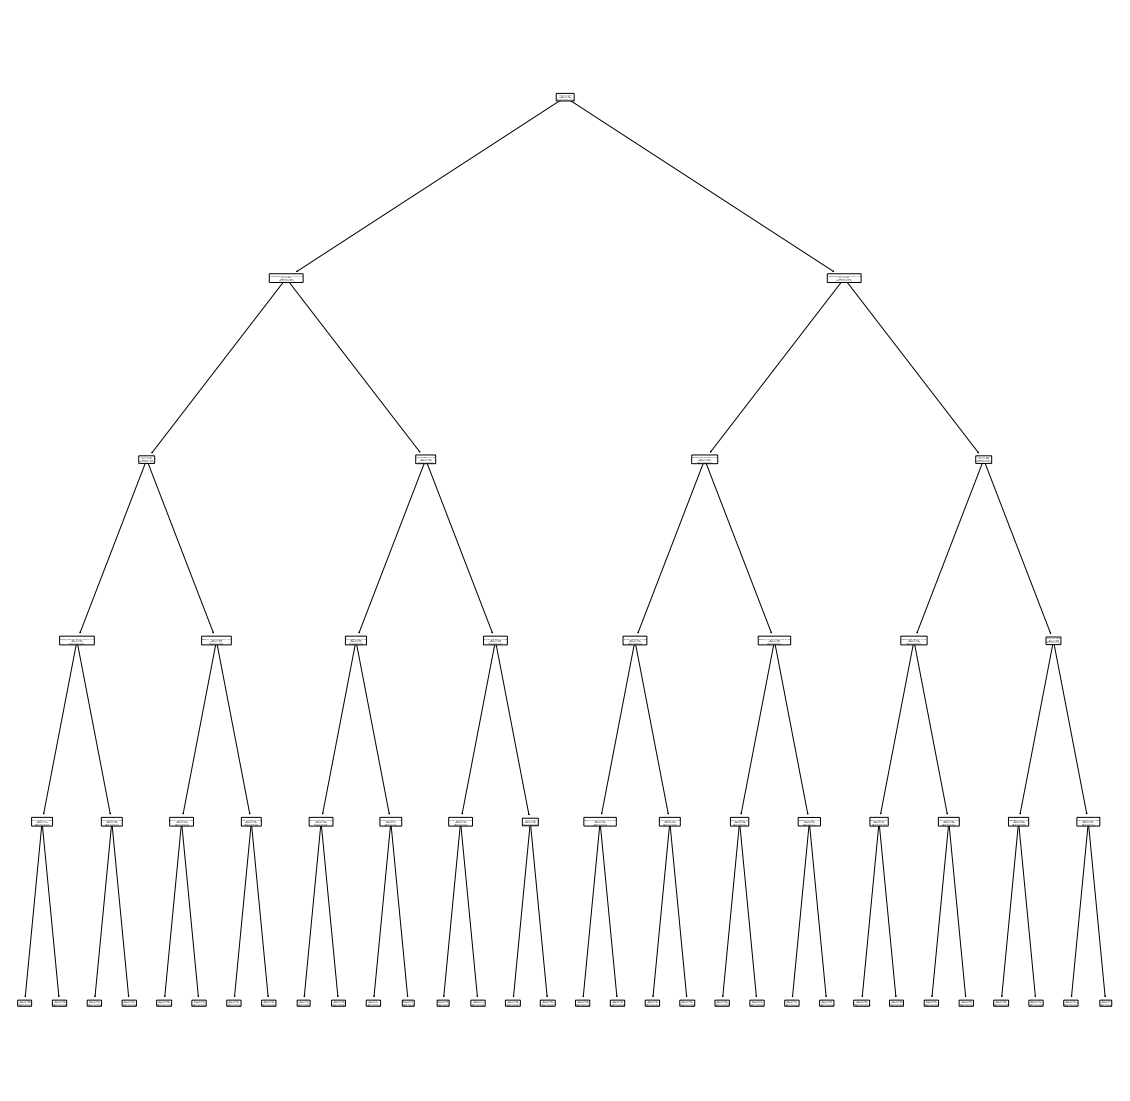

In [30]:
clf_telco2 = DecisionTreeClassifier(max_depth = 5, random_state=321)

clf_telco2 = clf_telco2.fit(X_telco_train, y_telco_train)

plt.figure(figsize=(20,20))
plot_tree(clf_telco2, feature_names = X_telco_train.columns, class_names = np.array(['no churn', 'churn']), rounded=True)

In [31]:
#now evaluate the model over the train set
y_pred_telco2 = clf_telco2.predict(X_telco_train)
pd.Series(y_pred_telco2)

0       0
1       0
2       0
3       1
4       0
       ..
3932    1
3933    0
3934    0
3935    1
3936    0
Length: 3937, dtype: uint8

In [29]:
y_pred_prob_telco2 = clf_telco2.predict_proba(X_telco_train)
y_pred_prob_telco2[0:5]

array([[0.80496454, 0.19503546],
       [0.72413793, 0.27586207],
       [0.6       , 0.4       ],
       [0.        , 1.        ],
       [0.88821138, 0.11178862]])

In [34]:
pd.DataFrame(metrics.confusion_matrix(y_telco_train, y_pred_telco2))

,0,1
0,2563,328
1,439,607


In [43]:
tn, fp, fn, tp = metrics.confusion_matrix(y_telco_train, y_pred_telco2).ravel()

tp_rate = tp/(fn+tp)
tn_rate = tn/(fp+tn)
fp_rate = fp/(fp+tp)
fn_rate = fn/(fn+tn)
accuracy = (tp+tn)/(tp+tn+fn+fp)

print(f"tp_rate = {tp_rate}\ntn_rate = {tn_rate}\nfp_rate = {fp_rate}\nfn_rate = {fn_rate}\nacc = {accuracy}")

tp_rate = 0.5803059273422562
tn_rate = 0.8865444482877897
fp_rate = 0.3508021390374332
fn_rate = 0.14623584277148569
acc = 0.8051816103632208


In [36]:
f"Accuracy of Decision Tree Model 2: {clf_telco2.score(X_telco_train, y_telco_train)}"

'Accuracy of Decision Tree Model 2: 0.8051816103632208'

In [38]:
print(metrics.classification_report(y_telco_train, y_pred_telco2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2891
           1       0.65      0.58      0.61      1046

    accuracy                           0.81      3937
   macro avg       0.75      0.73      0.74      3937
weighted avg       0.80      0.81      0.80      3937



now make predictions with validate data

In [52]:
#make a validate set

X_telco_val = t_validate.select_dtypes(exclude= 'object').drop(columns='churn_Yes')
y_telco_val = t_validate.churn_Yes

In [62]:
#make predictions and spit out the accuracy and classification report

models = [clf_telco, clf_telco2]
for i, model in enumerate(models):
    print("===========================================================")
    print(f"model {i+1}")
    print(f"Accuracy of decision tree {i+1} on validate: {model.score(X_telco_val, y_telco_val)}")
    y_pred = model.predict(X_telco_val)
    print(metrics.classification_report(y_telco_val, y_pred))
    

model 1
Accuracy of decision tree 1 on validate: 0.7931769722814499
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1033
           1       0.68      0.41      0.51       374

    accuracy                           0.79      1407
   macro avg       0.75      0.67      0.69      1407
weighted avg       0.78      0.79      0.77      1407

model 2
Accuracy of decision tree 2 on validate: 0.7931769722814499
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



We probably want to optimize recall on using churn as the positive case (since churn is so costly, it makes sense to try to keep as many customers as possible).  In this, the second model is better by 0.12.  